In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
# sklearn
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
!pip install --upgrade pandas


In [2]:
data1=pd.read_csv("C:/Users/visha/OneDrive/Documents/processeddata.csv")
data1

,Unnamed: 0,review,sentiment,processed,word count,length
0,0,One reviewers mentioned watching 1 Oz episode ...,1,one reviewers mentioned watching 1 oz episode ...,215,215
1,1,wonderful little production. <br / ><br / >The...,1,wonderful little production the filming techni...,116,116
2,2,thought wonderful way spend time hot summer we...,1,thought wonderful way spend time hot summer we...,116,116
3,3,Basically ' family little boy ( Jake ) thinks ...,0,basically family little boy jake thinks zo...,92,92
4,4,"Petter Mattei ' "" Love Time Money "" visually s...",1,petter mattei love time money visually stun...,160,160
...,...,...,...,...,...,...
49577,49995,thought movie right good job. ' creative origi...,1,thought movie right good job creative origina...,114,114
49578,49996,"Bad plot , bad dialogue , bad acting , idiotic...",0,bad plot bad dialogue bad acting idiotic di...,73,73
49579,49997,Catholic taught parochial elementary schools n...,0,catholic taught parochial elementary schools n...,142,142
49580,49998,' going disagree previous comment side Maltin ...,0,going disagree previous comment side maltin o...,135,135


In [3]:
# Binarisation of Sentiments: Positive: 1, Negative: 0

lb=LabelBinarizer()

#Transformed sentiment data
sentiment_data=lb.fit_transform(data1['sentiment'])
print(sentiment_data.shape)

(49582, 1)


In [4]:
#train dataset
X = data1.processed
y = data1.sentiment
print(X.shape, y.shape)

data1.isnull().sum()



(49582,) (49582,)


Unnamed: 0    0
review        0
sentiment     0
processed     0
word count    0
length        0
dtype: int64

In [5]:
X

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production the filming techni...
2        thought wonderful way spend time hot summer we...
3        basically  family little boy  jake  thinks  zo...
4        petter mattei   love time money  visually stun...
                               ...                        
49577    thought movie right good job  creative origina...
49578    bad plot  bad dialogue  bad acting  idiotic di...
49579    catholic taught parochial elementary schools n...
49580     going disagree previous comment side maltin o...
49581    one expects star trek movies high art  fans ex...
Name: processed, Length: 49582, dtype: object

In [6]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49577    1
49578    0
49579    0
49580    0
49581    0
Name: sentiment, Length: 49582, dtype: int64

In [7]:
#split the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 45)
     


In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(34707,)
(34707,)
(14875,)
(14875,)


In [9]:

X_train

48643    actually liked movie end sure  cheesy pretty u...
27736    obviously previous reviewers fans genre  think...
30284    full plot holes  inaccuracies   timeclock stop...
13742    knew premise film  obviously  miss good soundi...
22008    movie nice well pictured  originality  this mo...
                               ...                        
32469    pokemon 3 little three four episodes tv series...
16317    photography jumpy follow dark scenes hard seeh...
12895    film xavier  erasmus exchange student paris sp...
6012     odd thing galaxina supremely bad  although is ...
6558     really liked first part film africa hour anima...
Name: processed, Length: 34707, dtype: object

In [22]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train.shape

(34707, 149502)

In [11]:

featureName = vectorizer.get_feature_names()
print("Number of features - ", len(featureName))
print("Last 30 features are\n", featureName[-30:])

     


Number of features -  149502
Last 30 features are
 ['zumhofe', 'zungia', 'zuni', 'zuniga', 'zunz', 'zurer', 'zurich', 'zurlini', 'zutaut', 'zuzzzuzz', 'zvonimir', 'zvyagvatsev', 'zwart', 'zwarts', 'zweite', 'zwick', 'zwrite', 'zx81', 'zy', 'zyuranger', 'zz', 'zzvorkov', 'zzzz', 'zzzzip', 'zzzzz', 'zzzzzzzz', 'zzzzzzzzzzzz', 'zzzzzzzzzzzzpop', 'zzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzz']


In [12]:

vectorizer.vocabulary_


{'actually': 4134,
 'liked': 76416,
 'movie': 86716,
 'end': 42435,
 'sure': 128224,
 'cheesy': 24038,
 'pretty': 103193,
 'unlikely': 139272,
 'still': 125328,
 'kept': 71976,
 'attention': 10588,
 'rainy': 106273,
 'afternoon': 4927,
 'is': 68579,
 'final': 49278,
 'performance': 98483,
 'prestigious': 103117,
 'classical': 25535,
 'conservatory': 28621,
 'struggled': 126460,
 'catchup': 22383,
 'classically': 25536,
 'trained': 135442,
 'students': 126534,
 'main': 79542,
 'character': 23399,
 'wow': 147411,
 'grasp': 56714,
 'execution': 45201,
 'time': 133434,
 'honored': 62968,
 'musical': 88129,
 'tradition': 135349,
 'no': 90504,
 'tortures': 134923,
 'butchers': 20221,
 'great': 56871,
 'sensuous': 116791,
 'habanera': 58217,
 'carmen': 21776,
 'turns': 137003,
 'utterly': 140511,
 'forgettable': 51113,
 'brittany': 18896,
 'spearswannabe': 123160,
 'pop': 101599,
 'song': 122353,
 'ears': 40596,
 'bled': 16167,
 'supreme': 128194,
 'moment': 85403,
 'horror': 63263,
 'teacher

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer


vect = TfidfVectorizer()
X = vect.fit_transform(data1['processed'])



# 1) Logistic regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 88.30%


In [41]:
matrix = confusion_matrix(Y_test, logreg_pred)
print(matrix)
print("\n")
print(classification_report(Y_test, logreg_pred))


[[6545  907]
 [ 833 6590]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7452
           1       0.88      0.89      0.88      7423

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875



AxesSubplot(0.125,0.125;0.62x0.755)


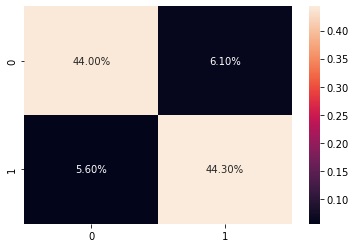

In [42]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))


# 2) Multinomial Naive Bayes


In [36]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, Y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))



Test accuracy: 85.75%


In [43]:
matrix = confusion_matrix(Y_test, mnb_pred)

print(matrix)
print("\n")
print(classification_report(Y_test, mnb_pred))


[[6483  969]
 [1150 6273]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7452
           1       0.87      0.85      0.86      7423

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



AxesSubplot(0.125,0.125;0.62x0.755)


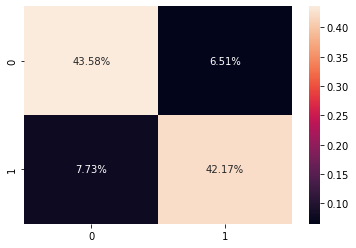

In [44]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))


# 3) Support Vector Machine


In [37]:
svc = LinearSVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, Y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))



Test accuracy: 86.47%


In [45]:
matrix = confusion_matrix(Y_test, svc_pred)

print(matrix)
print("\n")
print(classification_report(Y_test, svc_pred))

[[6405 1047]
 [ 966 6457]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7452
           1       0.86      0.87      0.87      7423

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



AxesSubplot(0.125,0.125;0.62x0.755)


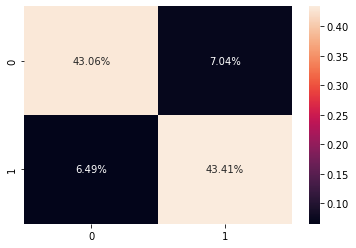

In [46]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   2.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   1.9s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   2.4s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   1.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   1.5s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.873 total time=   1.2s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.879 total time=   1.5s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.875 total time=   1.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.880 total time=   1.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.879 total time=   1.6s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.860 total time=   3.0s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [49]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.88
best parameters:  {'C': 0.1, 'loss': 'squared_hinge'}


In [50]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, yY_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

NameError: name 'yY_test' is not defined

In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))
